<a href="https://colab.research.google.com/github/Hyun-ho-Lee/Kaggle-and-Project/blob/master/%EB%B9%85%EC%BD%98_eda_ing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 빅콘테스트 데이터분석분야 수산 Biz 부문 

# 1. 필요 패키지 정의

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


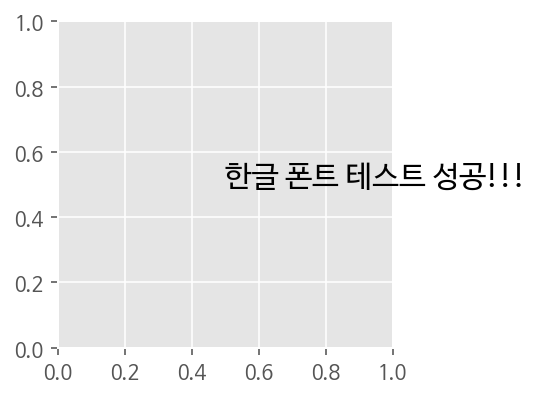

In [88]:
# 그래프 한글폰트 사용설정 in Colab - 한번 실행 후 폰트가 깨진다면 런타임 다시시작 후 한번 더 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

fontpath = '("/content/drvie/MyDrive/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

## Test
plt.figure(figsize=(3,3))
plt.text(0.5, 0.5, '한글 폰트 테스트 성공!!!', size=15)
plt.show()

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
import os 
from google.colab import drive
drive.mount('/content/drvie')
train_data= pd.read_excel("/content/drvie/MyDrive/bigcon1.xlsx")

Drive already mounted at /content/drvie; to attempt to forcibly remount, call drive.mount("/content/drvie", force_remount=True).


# 2.Data Check

In [104]:
train_data.shape

(42073, 9)

In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42073 entries, 0 to 42072
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REG_DATE       42073 non-null  datetime64[ns]
 1   CTRY_1         42073 non-null  object        
 2   CTRY_2         42073 non-null  object        
 3   P_PURPOSE      42073 non-null  object        
 4   CATEGORY_1     42073 non-null  object        
 5   CATEGORY_2     42073 non-null  object        
 6   P_NAME         42073 non-null  object        
 7   P_IMPORT_TYPE  42073 non-null  object        
 8   P_PRICE        42073 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 2.9+ MB


In [89]:
train_data.head(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [90]:
train_data.tail(5)

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
42068,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,왕게,활,38.437099
42069,2019-12-30,수산물,중국,중국,판매용,연체류 해물모듬,낙지,낙지,활,8.282274
42070,2019-12-30,수산물,러시아,러시아,판매용,갑각류,게,대게,활,23.396192
42071,2019-12-30,수산물,중국,중국,판매용,패류 멍게류,바지락,바지락,활,0.852967
42072,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,13.205675


In [91]:
train_data.describe()

,P_PRICE
count,42073.000000
mean,9.545346
std,21.914624
min,0.203770
25%,2.654165
50%,5.165478
75%,9.929108
max,1522.038402


In [100]:
train_data['P_TYPE'].value_counts()

수산물    42073
Name: P_TYPE, dtype: int64

In [101]:
train_data=train_data.drop('P_TYPE',axis=1)
y=train_data['P_PRICE']

In [102]:
objects=train_data.select_dtypes(include=['object'])
objects.columns

Index(['CTRY_1', 'CTRY_2', 'P_PURPOSE', 'CATEGORY_1', 'CATEGORY_2', 'P_NAME',
       'P_IMPORT_TYPE'],
      dtype='object')

In [106]:
train_data.isnull().sum()

REG_DATE         0
CTRY_1           0
CTRY_2           0
P_PURPOSE        0
CATEGORY_1       0
CATEGORY_2       0
P_NAME           0
P_IMPORT_TYPE    0
P_PRICE          0
dtype: int64

In [98]:
train_data[train_data['CTRY_1'] != train_data['CTRY_2'] ]

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
17,2015-12-28,수산물,프랑스,스페인,판매용,어류,참치 새치류,대서양참다랑어,냉장,28.868041
23,2015-12-28,수산물,대한민국,북한,판매용,젓갈류 해조류 해파리,미역,미역,염장,0.913119
39,2015-12-28,수산물,대만,벨리즈,판매용,어류,꽁치 학꽁치,꽁치,냉동,0.956387
40,2015-12-28,수산물,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,필렛(F),횟감",12.799577
41,2015-12-28,수산물,대만,일본,판매용,어류,참치 새치류,눈다랑어,"냉동,목살,횟감",3.628571
...,...,...,...,...,...,...,...,...,...,...
42006,2019-12-30,수산물,에콰도르,베네수엘라,외화획득용 원료,어류,갈치,갈치,냉동,1.774222
42009,2019-12-30,수산물,러시아,중국,판매용,어류,명태,명태,냉동,5.051081
42030,2019-12-30,수산물,러시아,중국,판매용,어류,가자미,각시가자미,냉동,2.263721
42040,2019-12-30,수산물,러시아,중국,판매용,어류,명태,명태,"냉동,필렛(F)",3.226426


# 3.EDA(~ing)

In [92]:
CTRY1_MEAN = train_data.groupby('CTRY_1')['P_PRICE'].agg(**{'CTRY_1 mean price':'mean'}).reset_index()
CTRY1_MEAN=CTRY1_MEAN.sort_values(by=['CTRY_1 mean price'], axis=0,ascending=False)

In [94]:
CATEGORY_1_MEAN=train_data.groupby('CATEGORY_1')['P_PRICE'].agg(**{'Category 1 mean price':'mean'}).reset_index()
CATEGORY_1_MEAN=CATEGORY_1_MEAN.sort_values(by=['Category 1 mean price'], axis=0,ascending=False)

In [96]:
CATEGORY_2_MEAN=train_data.groupby('CATEGORY_2')['P_PRICE'].agg(**{'Category 2 mean price':'mean'}).reset_index()
CATEGORY_2_MEAN=CATEGORY_2_MEAN.sort_values(by=['Category 2 mean price'], axis=0,ascending=False)

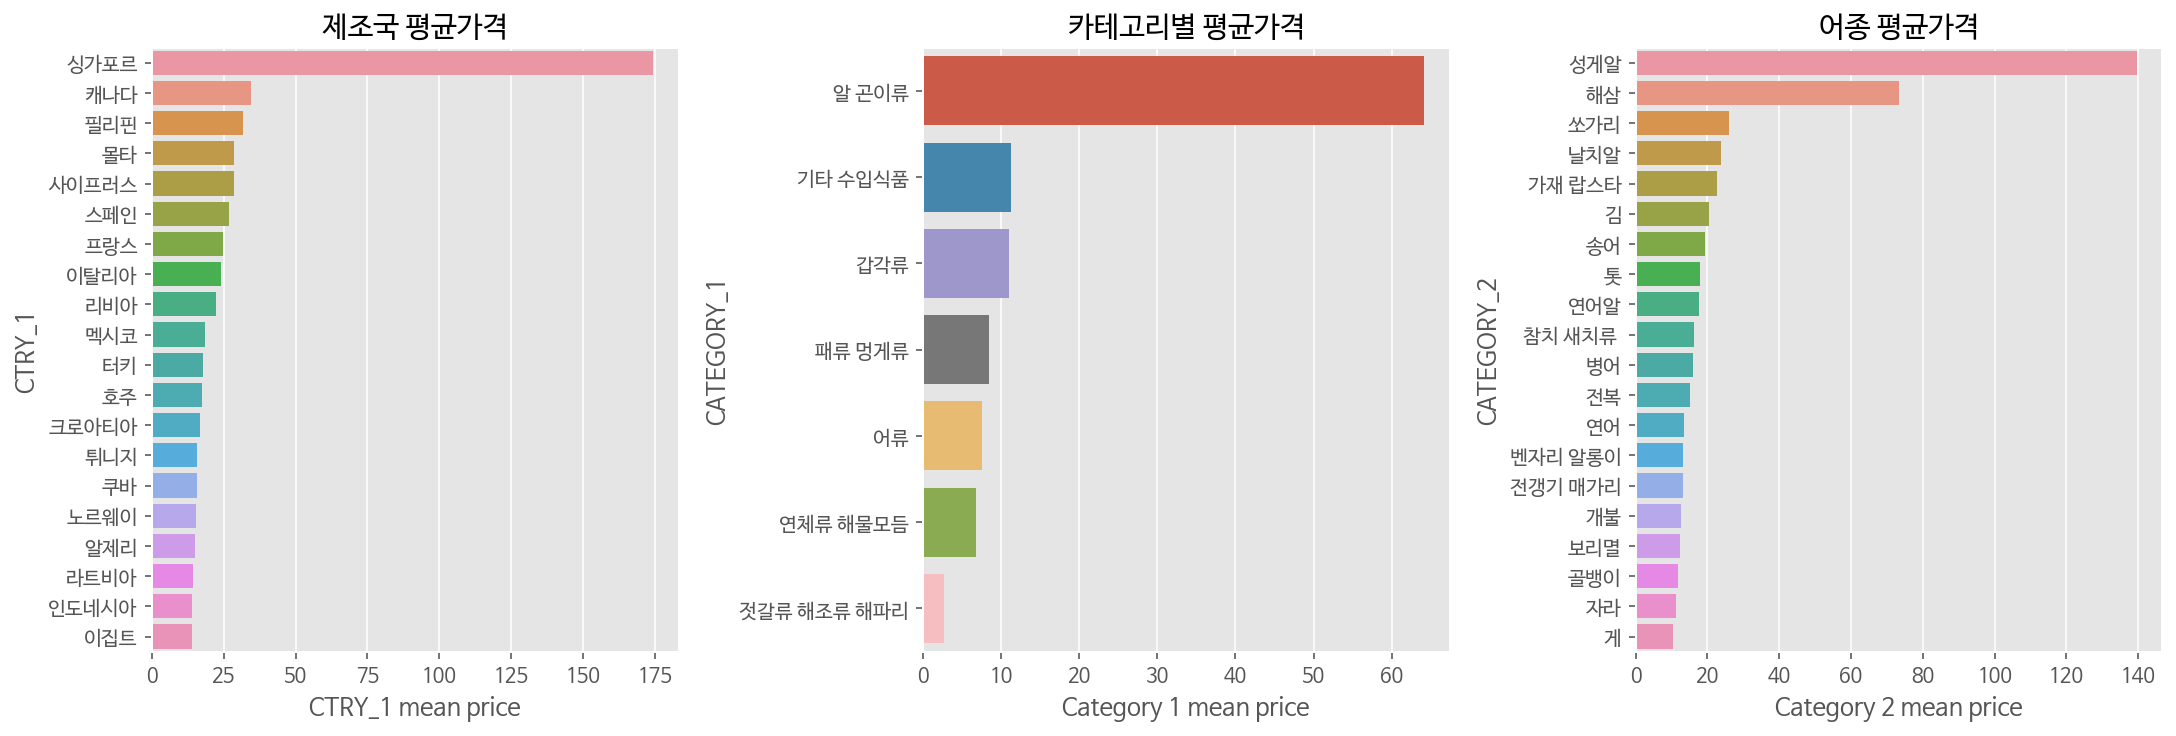

In [212]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=False,constrained_layout=True)
sns.barplot(data = CTRY1_MEAN[0:20], y='CTRY_1', x='CTRY_1 mean price',ax=axes[0])
axes[0].set_title("제조국 평균가격")
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price',ax=axes[1]) 
axes[1].set_title("카테고리별 평균가격")
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price',ax=axes[2])
axes[2].set_title("어종 평균가격")
plt.show()

In [ ]:
#CTRY_1 확인 결과 싱가포르가 제조국 평균 가격이 극단적으로 높음을 알수있음 값 확인은 위의 Value_counts() 코드 확인
plt.figure(figsize=(10,20))
plt.xticks(rotation = 90)
plt.title('제조국 평균 가격', pad= 20)
sns.barplot(data = CTRY1_MEAN, y='CTRY_1', x='CTRY_1 mean price') 

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('카테고리별 평균가격', pad= 20)
sns.barplot(data = CATEGORY_1_MEAN, y='CATEGORY_1', x='Category 1 mean price') 

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 90)
plt.title('어종 평균가격', pad= 20)
sns.barplot(data = CATEGORY_2_MEAN[0:20], y='CATEGORY_2', x='Category 2 mean price')

In [ ]:
range(len(objects.columns))

In [ ]:
sortvalue=train_data['CTRY_1'].value_counts()
sortvalue

In [ ]:
sortvalue2=train_data['CTRY_2'].value_counts()
sortvalue2

Text(0.5, 1.0, 'P_PRICE OF REG_DATA CATEGORY_1')

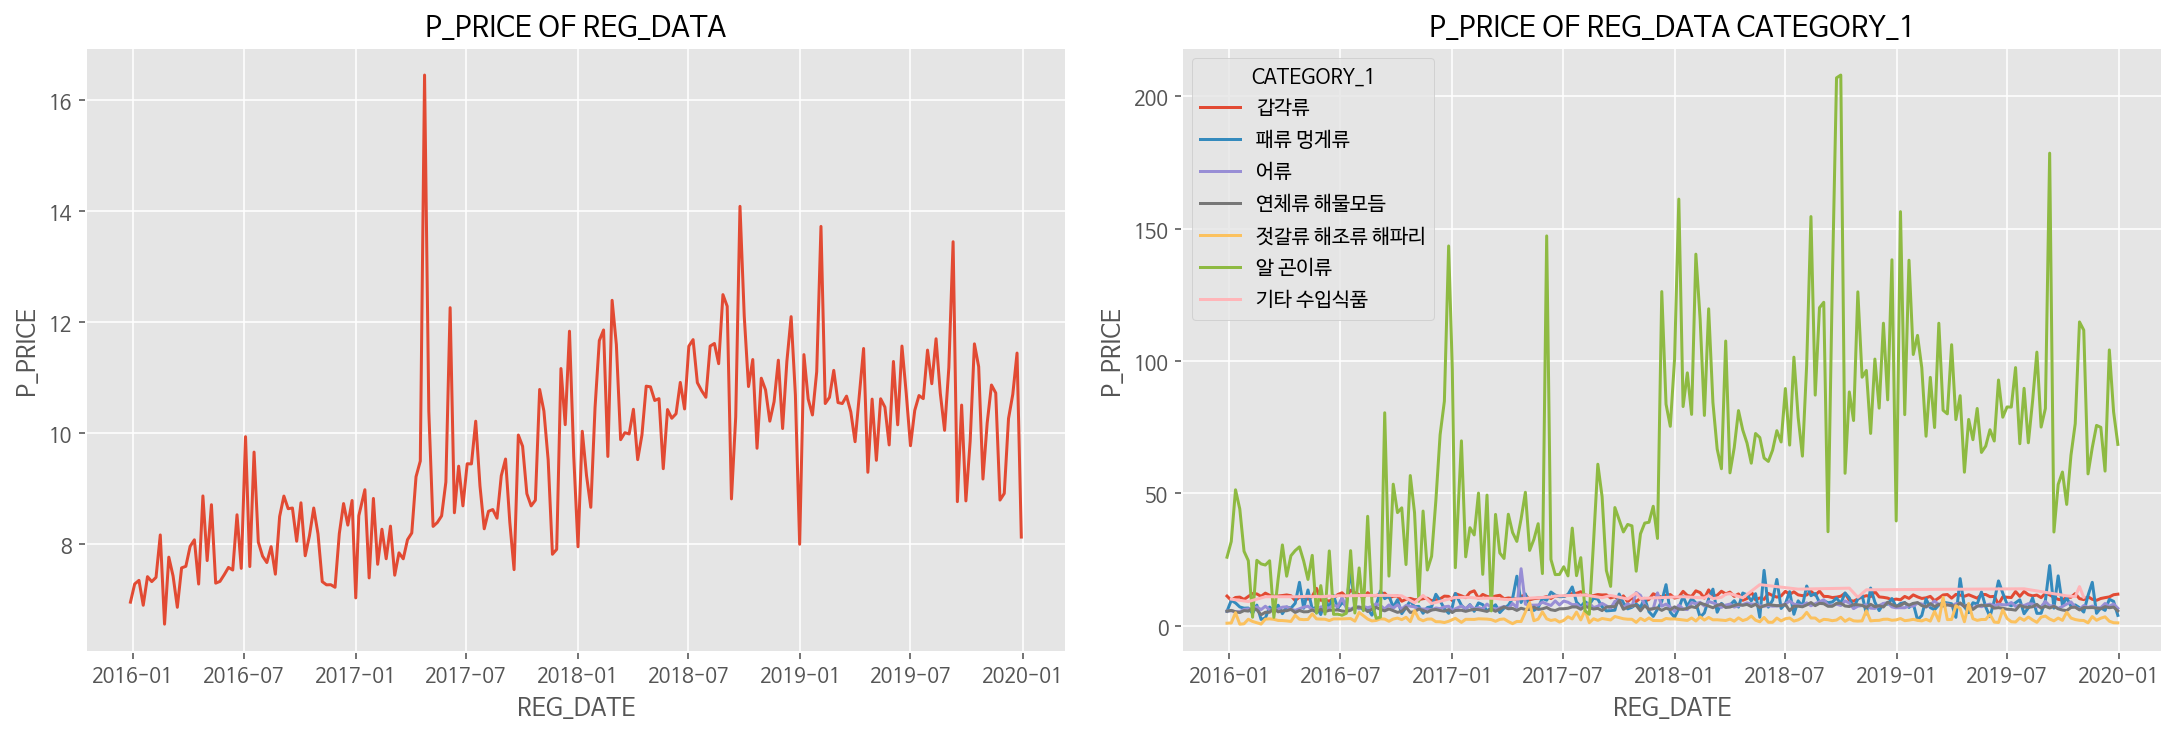

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',ci=None,ax=axes[0])
axes[0].set_title("P_PRICE OF REG_DATA")
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None,ax=axes[1])
axes[1].set_title("P_PRICE OF REG_DATA CATEGORY_1")

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 0)
plt.title('P_PRICE OF REG_DATA CATEGORY_1', pad= 20)
sns.lineplot(data = train_data, x='REG_DATE', y='P_PRICE',hue='CATEGORY_1',ci=None) 

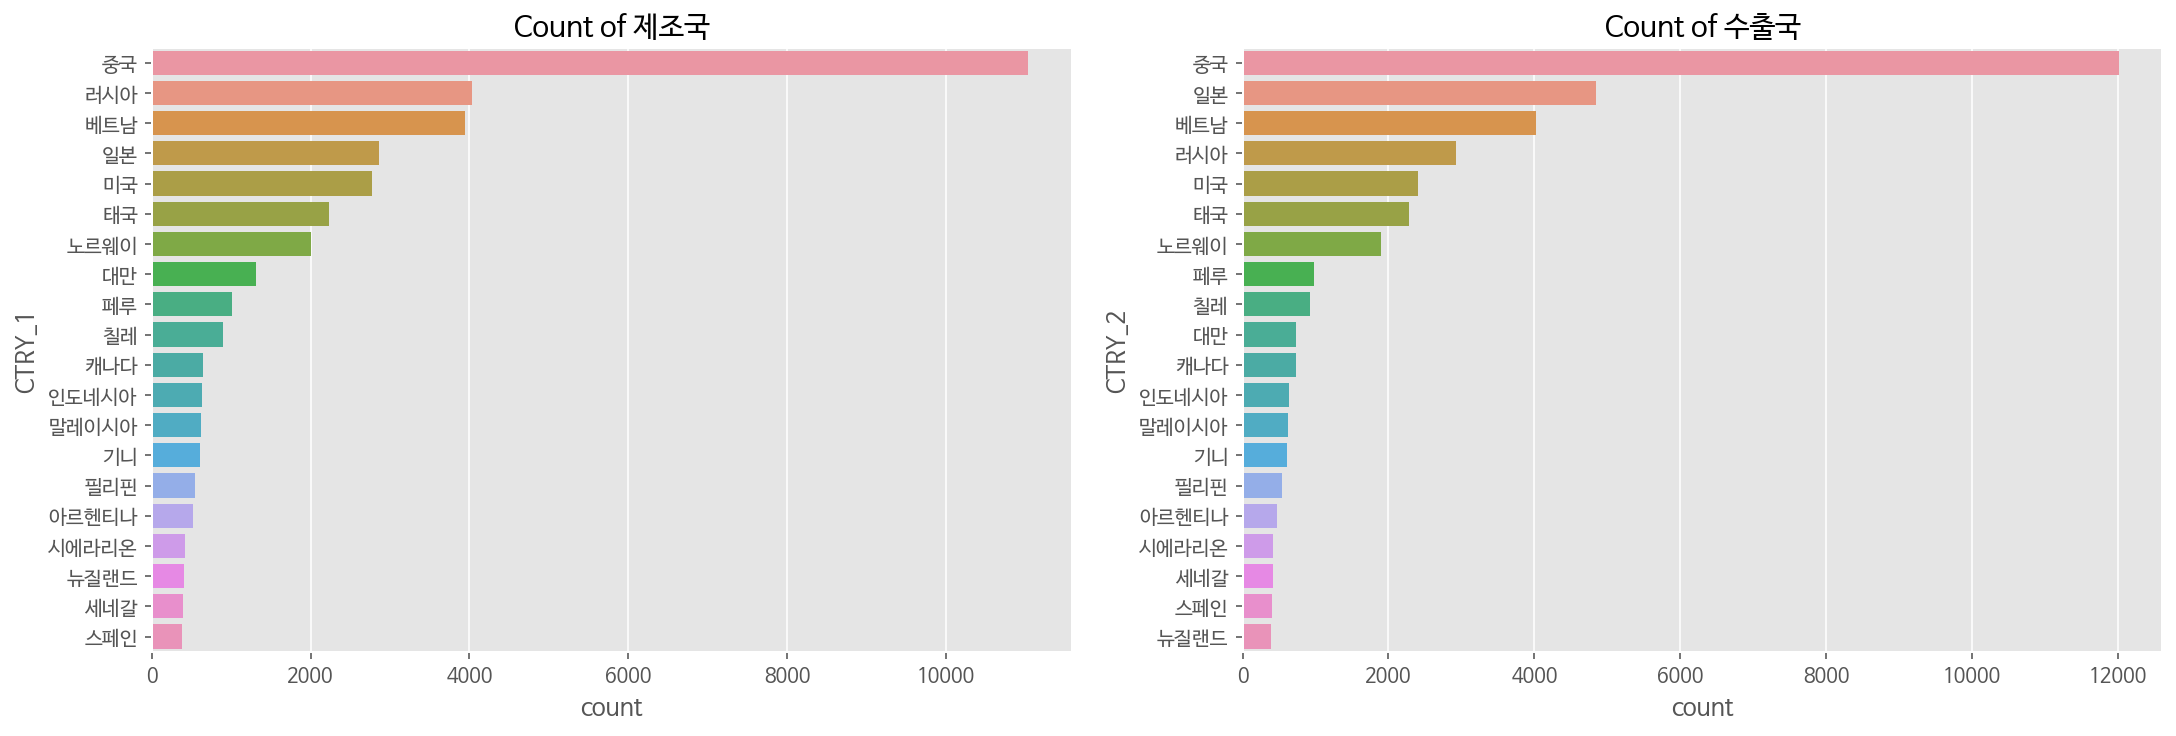

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False,constrained_layout=True)
sns.countplot(data = train_data, y='CTRY_1',order = sortvalue.index[0:20],ax=axes[0])
axes[0].set_title("Count of 제조국")
sns.countplot(data = train_data, y='CTRY_2',order = sortvalue2.index[0:20],ax=axes[1]) 
axes[1].set_title("Count of 수출국")
plt.show()

In [112]:
CATEGORY_1=train_data['CATEGORY_1'].value_counts()
CATEGORY_1

어류             21339
갑각류             7298
연체류 해물모듬        6772
패류 멍게류          5097
알 곤이류           1037
젓갈류 해조류 해파리      467
기타 수입식품           63
Name: CATEGORY_1, dtype: int64

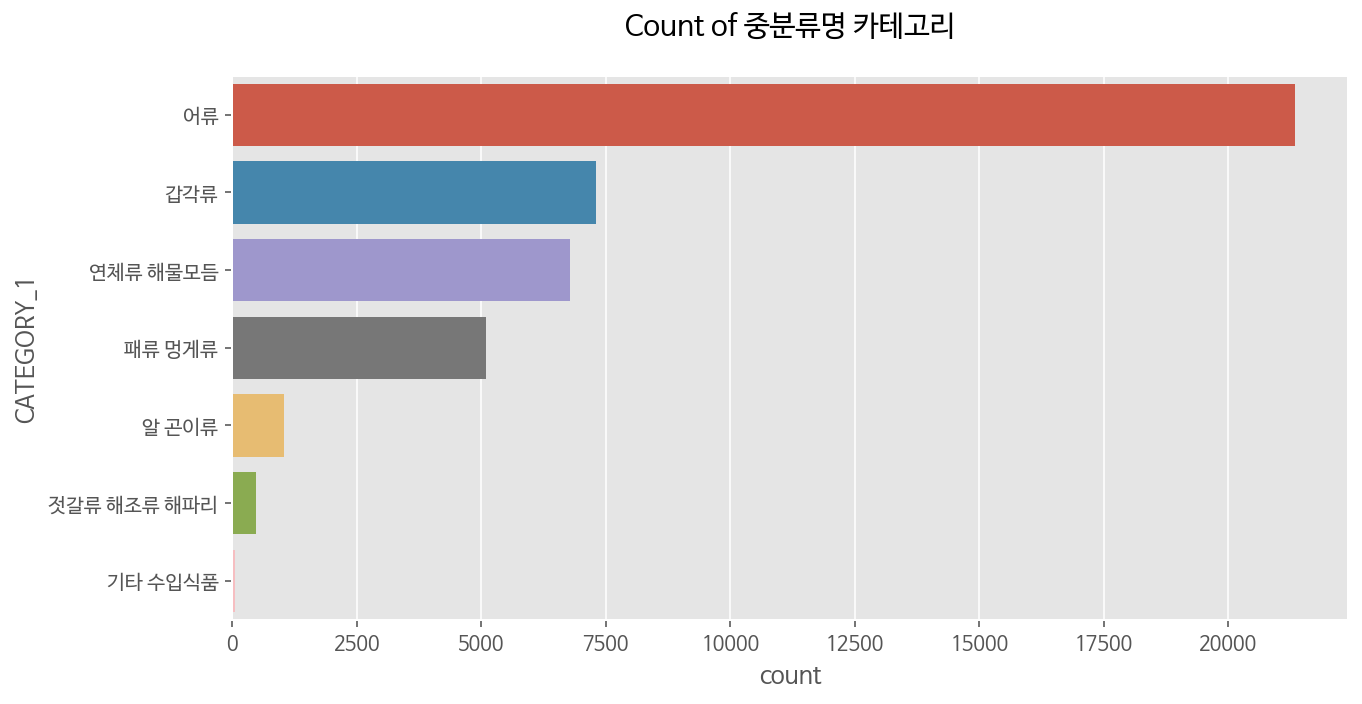

In [176]:
plt.figure(figsize=(10,5))
plt.title('Count of 중분류명 카테고리', pad= 20)
sns.countplot(data =train_data,y='CATEGORY_1',order = CATEGORY_1.index)
plt.show()

In [ ]:
CATEGORY_2 = train_data['CATEGORY_2'].value_counts()
CATEGORY_2

In [ ]:
plt.figure(figsize=(10,30))
plt.title('Count of 어종', pad= 20)
plt.xticks(rotation=90)
sns.countplot(data =train_data,y='CATEGORY_2',order = CATEGORY_2.index)
plt.show()

In [120]:
P_IMPOT_TYRE = train_data['P_IMPORT_TYPE'].value_counts()
P_IMPOT_TYRE

냉동                13568
활                  8280
냉장                 4682
냉동,살,자숙            1431
냉동,살               1044
                  ...  
냉동,개아지살,살,포장횟감        2
자숙,건조                 1
건조,지느러미,자숙            1
냉장,간                  1
냉동,자숙,절단,횟감           1
Name: P_IMPORT_TYPE, Length: 78, dtype: int64

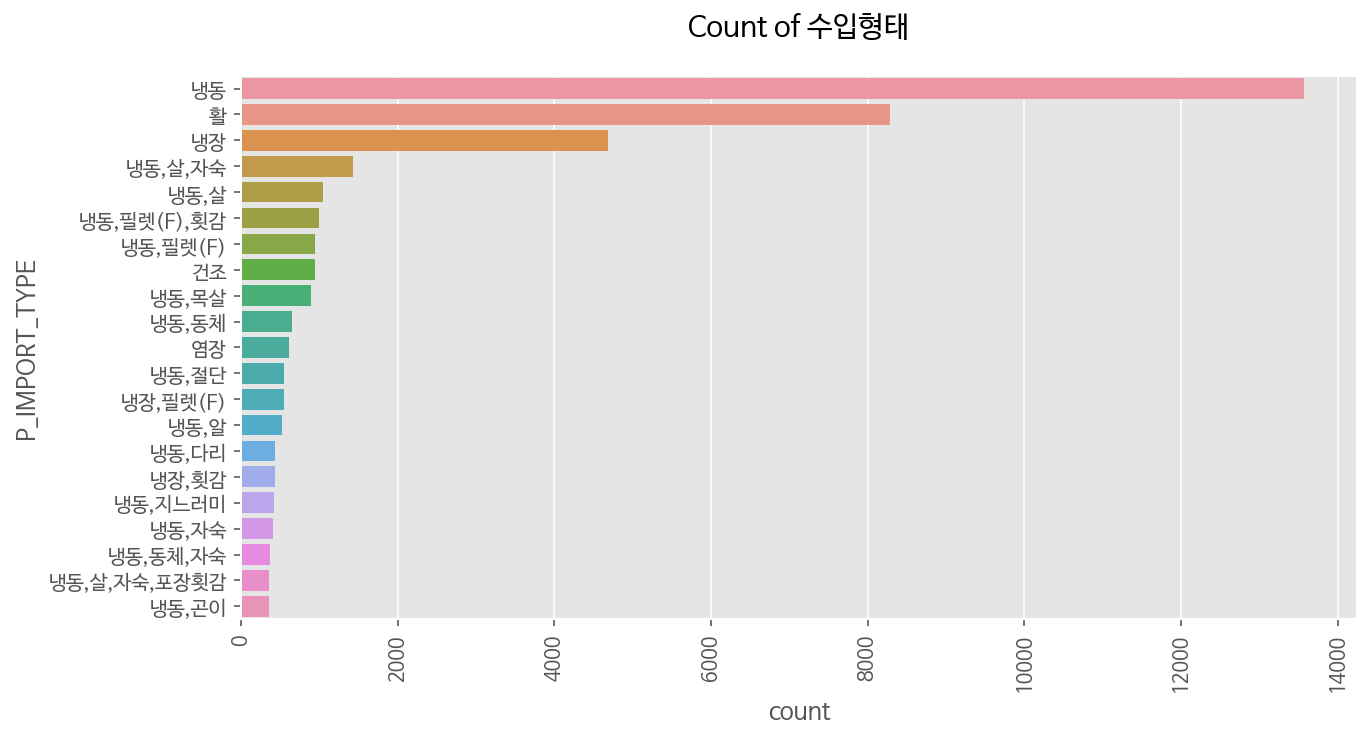

In [177]:
plt.figure(figsize=(10,5))
plt.title('Count of 수입형태', pad= 20)
plt.xticks(rotation=90)
sns.countplot(data =train_data,y='P_IMPORT_TYPE',order = P_IMPOT_TYRE.index[0:21])
plt.show()

In [183]:
train_data['P_NAME'].unique()

array(['아르헨티나붉은새우', '꽃게', '해삼', '서대', '은밀복', '옥돔', '까치복', '흰다리새우', '바지락',
       '가리비', '개조개', '문어', '주꾸미', '멍게', '대서양참다랑어', '파타고니아이빨고기', '낙지',
       '눈다랑어', '가오리', '미역', '뱀장어', '참다랑어', '대서양연어', '대구', '명태알', '대게',
       '줄민태', '홍서대', '위고둥', '꽁치', '황새치', '틸라피아', '오징어', '기름치', '바다가재',
       '까지가자미', '홍어', '먹장어', '명태', '홍다리얼룩새우', '화살오징어', '청상아리', '붕어',
       '감성돔', '자주복', '꼬막', '재첩', '피조개', '피뿔고둥', '능성어', '준치', '참돔', '연어',
       '왕게', '장문볼락', '각시가자미', '가자미', '털게', '해파리', '새우', '민밀복', '젓새우',
       '홍합', '백합,MERCENARIA MERCENARIA', '새꼬리민태알', '붕장어', '갈치', '밴댕이',
       '갑오징어', '성게알', '동자개', '코토니', '병어', '이스라엘잉어', '영상가이석태', '스피노잠',
       '새꼬막', '농어', '아귀', '긴가이석태', '방어', '고등어', '흑밀복', '홍민어', '북방대합',
       '백합', '황돔', '미꾸라지', '가무락조개', '부세', '줄비늘치', '개불', '비단조개', '깜장북방대합',
       '참조기', '비너스백합', '민들조개', '주름백합', '아담스백합', '은연어', '민어', '옥두어', '민꽃게',
       '골뱅이', '민물새우', '게', '임연수어', '해물혼합', '식용자라', '흑기흉상어', 'PANGASIUS메기',
       '보리멸', '마소치가자미', '귀상어', '동죽', '남방참다랑어', '송어', '적새우', '잉어', '

In [243]:
train_data['P_NAME'].value_counts()

흰다리새우        2601
오징어          2150
명태           1640
낙지           1617
연어           1489
             ... 
대두이석태           1
프로펠러조개          1
버터플라이 킹피쉬       1
다시마             1
병치매가리           1
Name: P_NAME, Length: 286, dtype: int64

In [239]:
P_NAME=train_data.groupby('P_NAME')['P_PRICE'].agg(**{'P_NAME mean price':'mean'}).reset_index()
PNAME_MEAN=P_NAME.sort_values(by=['P_NAME mean price'], axis=0,ascending=False)
PNAME_MEAN

,P_NAME,P_NAME mean price
238,청새리상어,229.380948
159,성게알,139.730706
33,금눈돔,105.159426
265,해삼,73.410829
150,상어,67.792968
...,...,...
206,장성베도라치,0.799846
103,물메기,0.650000
217,정어리,0.602548
165,스피노잠,0.515048


In [ ]:
P_NAME_count=train_data.groupby('P_NAME')['P_PRICE'].agg(**{'P_NAME mean price':'mean'}).reset_index()